<a href="https://colab.research.google.com/github/chabelicastano/cap4770-spring23/blob/main/Projects/AmazonReviews/ChabeliCastano_P04_AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# keras import
import keras
keras.__version__

'2.12.0'

In [2]:
# get the training data
!wget http://34.82.108.37/amazonReviewsTrain.csv.zip

--2023-04-26 22:52:26--  http://34.82.108.37/amazonReviewsTrain.csv.zip
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456705 (38M) [application/zip]
Saving to: ‘amazonReviewsTrain.csv.zip’

amazonReviewsTrain. 100%[===================>]  37.63M  29.5MB/s    in 1.3s    

2023-04-26 22:52:28 (29.5 MB/s) - ‘amazonReviewsTrain.csv.zip’ saved [39456705/39456705]



In [58]:
# dataframe
import pandas as pd
training_data = pd.read_csv('amazonReviewsTrain.csv.zip')
training_data

<ipython-input-58-22bbc294c687>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data = pd.read_csv('amazonReviewsTrain.csv.zip')


,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,positive
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,positive
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,positive
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,positive
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
221387,True,"08 16, 2015",A1TWEBKVZDD2JJ,B0002H05BA,Obey Giant,Still hard to beat D'Addario. Hope they keep i...,Five Stars,1439683200,NaN,"{'Size:': ' Regular Light, 10-46', 'Style:': '...",NaN,positive
221388,True,"01 8, 2012",AP32V2GXAK9VM,B000WME8C2,Grey,Ortofon hits the nail right on the head with t...,Headshell Impovment? YES!!!,1325980800,7.0,{'Color:': ' Black'},NaN,positive
221389,True,"10 22, 2017",A4BIHE0AYAMTP,B00MD7S06O,divbyzero,This is my absolute favorite guitar strap amon...,ecclesiastical / hippie,1508630400,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,positive
221390,True,"01 9, 2016",A3OCE03MZ2PC2J,B0017PLYCK,scaper,nice,Five Stars,1452297600,NaN,NaN,NaN,positive


In [59]:
# Check the labels ocurrence
training_data['rating'].value_counts()

positive    191950
neutral      15337
negative     14105
Name: rating, dtype: int64

In [60]:
# mapping
custom_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
# change the value on the df
training_data['rating'] = training_data['rating'].map(custom_mapping)
training_data

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,0
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,0
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,0
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,0
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
221387,True,"08 16, 2015",A1TWEBKVZDD2JJ,B0002H05BA,Obey Giant,Still hard to beat D'Addario. Hope they keep i...,Five Stars,1439683200,NaN,"{'Size:': ' Regular Light, 10-46', 'Style:': '...",NaN,0
221388,True,"01 8, 2012",AP32V2GXAK9VM,B000WME8C2,Grey,Ortofon hits the nail right on the head with t...,Headshell Impovment? YES!!!,1325980800,7.0,{'Color:': ' Black'},NaN,0
221389,True,"10 22, 2017",A4BIHE0AYAMTP,B00MD7S06O,divbyzero,This is my absolute favorite guitar strap amon...,ecclesiastical / hippie,1508630400,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,0
221390,True,"01 9, 2016",A3OCE03MZ2PC2J,B0017PLYCK,scaper,nice,Five Stars,1452297600,NaN,NaN,NaN,0


In [61]:
# text and label
# I did the 'astype(str)' part because I was getting a float error when using tokenizer
training_text = training_data.reviewText.astype(str)
training_labels = training_data.rating
training_labels

0         0
1         0
2         0
3         0
4         0
         ..
221387    0
221388    0
221389    0
221390    0
221391    0
Name: rating, Length: 221392, dtype: int64

In [62]:
# tokenizer
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20000)
#build the word index
tokenizer.fit_on_texts(training_text)
# now convert the words to integers
data_sequences = tokenizer.texts_to_sequences(training_text)
data_sequences[1]

[23,
 622,
 3,
 521,
 11,
 5490,
 14545,
 17,
 487,
 367,
 430,
 12,
 10,
 33,
 38,
 63,
 15,
 21,
 178,
 8]

In [11]:
tokenizer.sequences_to_texts([data_sequences[1]])

["good replacement i prefer my rovner l5 but there's nothing wrong with this if it's what you are looking for"]

In [63]:
# Let's truncate each review after 70 words
maxlen = 70

from keras.utils import pad_sequences

# 2D integer tensor of shape `(samples, maxlen)`
data70 = pad_sequences(data_sequences, maxlen=maxlen)
data70[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   18,  534,    9,   25,
         13, 2199,   22,  570], dtype=int32)

In [64]:
# train-test split
from sklearn.model_selection import train_test_split
train70, test70, train_labels, test_labels = train_test_split(data70, training_labels, test_size = 0.2, random_state=42)
test_labels

5028      2
133605    0
182161    0
137498    0
122233    1
         ..
45935     0
5691      0
83947     0
214291    1
8033      1
Name: rating, Length: 44279, dtype: int64

In [65]:
# labels to_categorical
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
# Build the model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

vocabulary_size = 20000
embedding_size = 70
model = Sequential()

In [14]:
# Let's use GloVe word embedding
!curl http://zacharski.org/files/courses/cs419/glove.6B.100d.zip > glove.6B.100d.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128M  100  128M    0     0   109M      0  0:00:01  0:00:01 --:--:--  109M
amazonReviewsTrain.csv.zip  glove.6B.100d.zip  sample_data


In [15]:
# unzip
!unzip glove.6B.100d.zip

Archive:  glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


In [67]:
# map words to vector representations
import numpy as np

embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [68]:
# embedding matrix 
embedding_dim = 100
max_words = 20000
word_index = tokenizer.word_index

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
# keep adding layers to the model

from keras import layers

model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# softmax because we have 3 categorical labels
model.add(Dense(3, activation='softmax'))
model.summary()

In [70]:
# I'm gonna try not setting trainable to False
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [71]:
#compile
#categorical_crossentropy since we have categorical labels
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#fit
history = model.fit(train70, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    validation_steps=50)

Not too bad. 92 % accuracy on training data and 88% accuracy on validation data

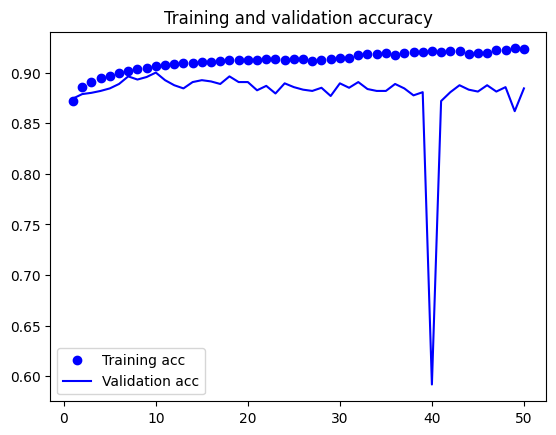

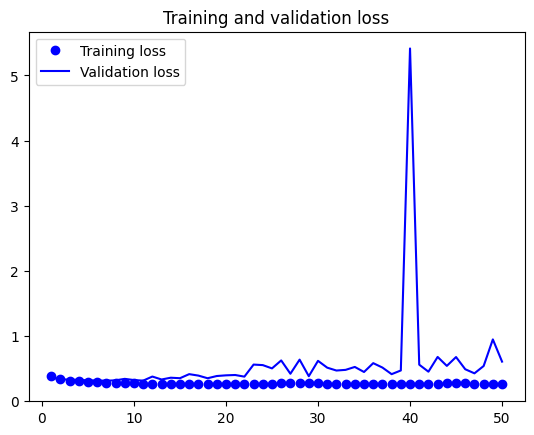

In [73]:
# Let's check if our model is overfitting
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Except for a drop in accuracy and an increase in loss, it doesn't seem to be overfitting much

In [81]:
#Let's do predictions on our test data (the one we split before)
scoreSeg = model.evaluate(test70, test_labels)
print("Accuracy: ", scoreSeg[1])

1384/1384 [==============================] - 9s 7ms/step - loss: 0.7351 - acc: 0.8958
Accuracy:  0.8958196640014648


We got 90% accuracy on test data

In [ ]:
#Let's try the model with the test data

test_data = pd.read_csv('http://34.82.108.37/amazonReviewsTest.csv')
test_data

In [75]:
# get the reviews
realtest_text = test_data.reviewText.astype(str)
realtest_text

0       I am a (very amateur) EDM and Hip Hop Producer...
1       These are pretty beefy strings even for black ...
2       I've played every new "improved" string out th...
3       I thought I would give this pedal a try, becau...
4       Been wanting to try one for over a year.  Good...
                              ...                        
9995    I took it off my guitar! I would rather look a...
9996    Better than the stock part on non-USA made gui...
9997    I'm updating this review after using the violi...
9998    A lot of sound research and engineering go int...
9999    This is my second stand like this. Looks reall...
Name: reviewText, Length: 10000, dtype: object

In [ ]:
tokenizer2 = Tokenizer(num_words = 20000)
#build the word index
tokenizer2.fit_on_texts(realtest_text)
# now convert the words to integers
data_sequences2 = tokenizer2.texts_to_sequences(realtest_text)
data_sequences2[1]

In [79]:
tokenizer2.sequences_to_texts([data_sequences2[1]])

["these are pretty beefy strings even for black nylons and while i'm used to slightly heavier strings for my fretless basses these go too far there's simply no reason to use a 115 gauge e string unless you really like taut strings and feel like getting a new bass setup they should swap the 115 string for a 050 gauge g string and shift the rest up so you'd get a 050 065 075 100 set actually a 050 065 085 105 set would be even better hey wait that's exactly what my la bella 750n set uses time to put those back on"]

In [80]:
# Let's truncate each review after 70 words, like we did with the training set

# 2D integer tensor of shape `(samples, maxlen)`
realtest70 = pad_sequences(data_sequences2, maxlen=maxlen)
realtest70[0]

array([   3,   39,  129,  175,   25,   22,   21,  322,    4,    3,   72,
        166,   33,   75, 1305,   46,   25,  322,   31, 2846,  358,    4,
         22,  403,  132,    5, 2523,   11,  953,   12,   11,   27,  122,
        315,  247,   25,  264, 1899,   49,  507,  396, 1526,  354,   13,
        847, 4845,  865, 2346,  235,   17,  246,   19,   58,  366,  107,
          7,  366,  107,    7,  974, 2191, 1527,   12,  122, 2633, 1186,
         69,  138, 2270,  342], dtype=int32)

In [82]:
# predictions with real test data
pred = model.predict(realtest70, batch_size=32)
pred.shape

313/313 [==============================] - 3s 10ms/step


(10000, 3)

In [83]:
pred

array([[9.8127967e-01, 1.8556867e-02, 1.6336553e-04],
       [5.6601530e-01, 2.0200074e-01, 2.3198403e-01],
       [9.2982775e-01, 6.0746226e-02, 9.4261225e-03],
       ...,
       [9.3877673e-01, 5.4009013e-02, 7.2142268e-03],
       [9.6264774e-01, 3.5107806e-02, 2.2443670e-03],
       [9.5762205e-01, 3.8925491e-02, 3.4523380e-03]], dtype=float32)

In [86]:
# write to the file
with open('amazonReviewsPredictions.txt', 'w') as f:
  for i in range(0, len(pred)):
    index = np.array(pred[i]).argmax()
    if index == 0:
      f.write("positive\n")
    elif index ==1:
      f.write("neutral\n")
    elif index ==2:
      f.write("negative\n")

In [87]:
# test given by the professor
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok")

In [89]:
test()

'file looks ok'

According to the test function, the file looks ok. Please, if possible, let me know how accurate my predictions were.